
# Week 2: Error Backpropagation in Neural Networks
## Objective:
In this notebook, we will explore the concept of backpropagation, a key algorithm used to train neural networks. We will cover activation functions, loss functions, and how the chain rule is used to compute gradients in multi-layer networks.



## 2.1 Theory: What is Backpropagation?
Backpropagation is a supervised learning algorithm used for training artificial neural networks. It computes the gradient of the loss function with respect to each weight by applying the chain rule, enabling the network to learn from errors and adjust its weights accordingly.

### Key Concepts:
- **Activation Functions**: Functions that introduce non-linearity to the network. Common examples include the sigmoid, ReLU, and tanh functions.
- **Loss Function**: Measures the error between the predicted output and the actual output. Common loss functions include Mean Squared Error (MSE) and Cross-Entropy.
- **Chain Rule**: A calculus rule used to compute the derivative of composite functions, crucial for backpropagation.


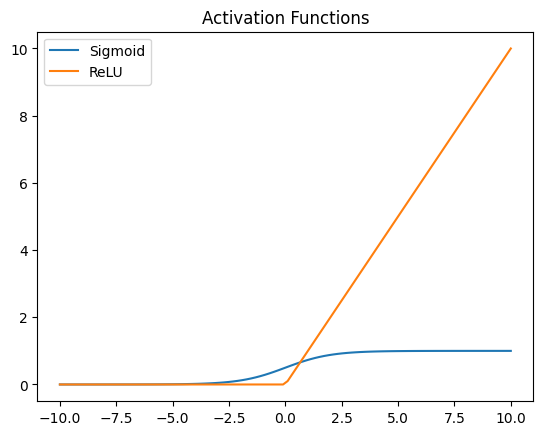

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Plotting activation functions
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.title("Activation Functions")
plt.legend()
plt.show()



## 2.2 Coding: Implementing Backpropagation

We will implement backpropagation for a simple multi-layer perceptron (MLP) using NumPy. The network will use the sigmoid activation function and mean squared error as the loss function.

### Backpropagation Algorithm:
1. Perform a forward pass to calculate the output.
2. Compute the loss function based on the predicted and actual outputs.
3. Apply the chain rule to compute the gradient of the loss with respect to the weights.
4. Update the weights using gradient descent.


In [5]:

# Backpropagation implementation for a simple MLP

class MLP:
    def __init__(self, input_size, hidden_size, output_size, lr=0.1):
        self.lr = lr
        # Initialize weights
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output = self.sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y):
        # Compute loss gradient
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        # Hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden)

        # Update weights
        self.weights_hidden_output += self.hidden.T.dot(output_delta) * self.lr
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.lr

        # Update biases
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.lr
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.lr

    def train(self, X, y, epochs=10000):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y)

# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR output

# Initialize and train MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1, lr=0.1)
mlp.train(X, y)

# Test the network
for inputs in X:
    print(f"Input: {inputs}, Predicted Output: {mlp.forward(inputs)}")


Input: [0 0], Predicted Output: [[0.04842466]]
Input: [0 1], Predicted Output: [[0.49970135]]
Input: [1 0], Predicted Output: [[0.94321206]]
Input: [1 1], Predicted Output: [[0.50641255]]



## 2.3 Exercises:
- Modify the network to use ReLU instead of the sigmoid activation function and observe how the output changes.
- Train the MLP on a different dataset, such as AND or OR logic gates, and compare the performance.
- Implement Cross-Entropy loss instead of Mean Squared Error and see how it affects learning.
